In [1]:
import numpy as np
import pandas as pd
import ast
import string
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [2]:
# Dataframe for movies and credits

movie = pd.read_csv('datasets/tmdb_5000_movies.csv')
credit = pd.read_csv('datasets/tmdb_5000_credits.csv')

In [3]:
print("Movies Dataset:\n")
movie.head()

Movies Dataset:



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movie.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

## Visualization of Dataset

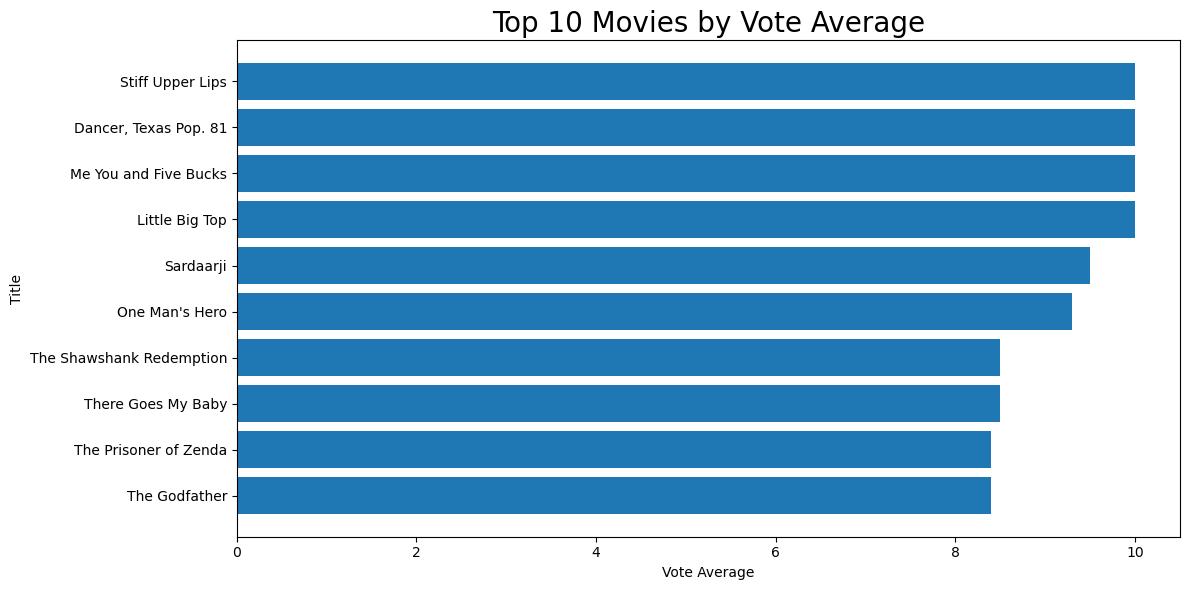

In [5]:
# Sort the DataFrame based on 'vote_average' and select the top 10 movies
top_10_by_vote_average = movie.nlargest(10, 'vote_average')

# Plotting the graph for vote_average vs title
plt.figure(figsize=(12, 6))
plt.barh(top_10_by_vote_average['title'], top_10_by_vote_average['vote_average'])
plt.xlabel('Vote Average')
plt.ylabel('Title')
plt.title('Top 10 Movies by Vote Average', size = 20)
plt.gca().invert_yaxis()  # Invert y-axis to display highest vote average on top
plt.tight_layout()
plt.show()

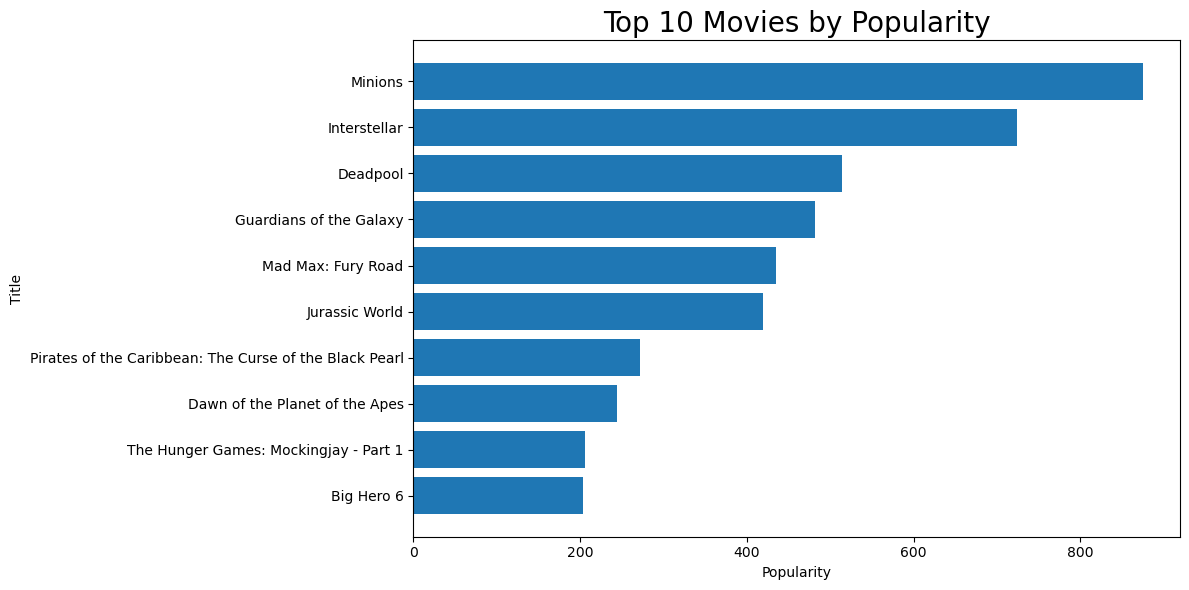

In [6]:
# Sort the DataFrame based on 'popularity' and select the top 10 movies
top_10_by_popularity = movie.nlargest(10, 'popularity')

# Plotting the graph for popularity vs title
plt.figure(figsize=(12, 6))
plt.barh(top_10_by_popularity['title'], top_10_by_popularity['popularity'])
plt.xlabel('Popularity')
plt.ylabel('Title')
plt.title('Top 10 Movies by Popularity', size = 20)
plt.gca().invert_yaxis()  # Invert y-axis to display highest popularity on top
plt.tight_layout()
plt.show()

In [7]:
# Function to format large numbers into a readable format (e.g., 237M)
def format_large_numbers(x, pos=None):
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

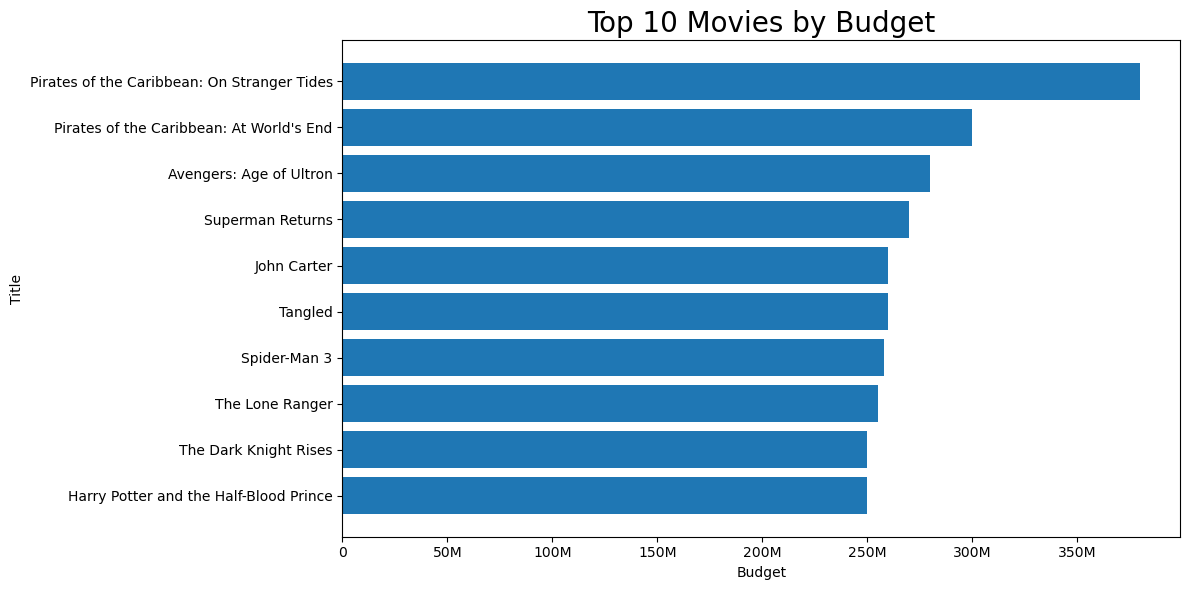

In [8]:
# Sort the DataFrame based on 'budget' and select the top 10 movies
top_10_by_budget = movie.nlargest(10, 'budget')

# Plotting the graph for budget vs title
plt.figure(figsize=(12, 6))
plt.barh(top_10_by_budget['title'], top_10_by_budget['budget'])
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))
plt.xlabel('Budget')
plt.ylabel('Title')
plt.title('Top 10 Movies by Budget', size = 20)
plt.gca().invert_yaxis()  # Invert y-axis to display highest budget on top
plt.tight_layout()
plt.show()

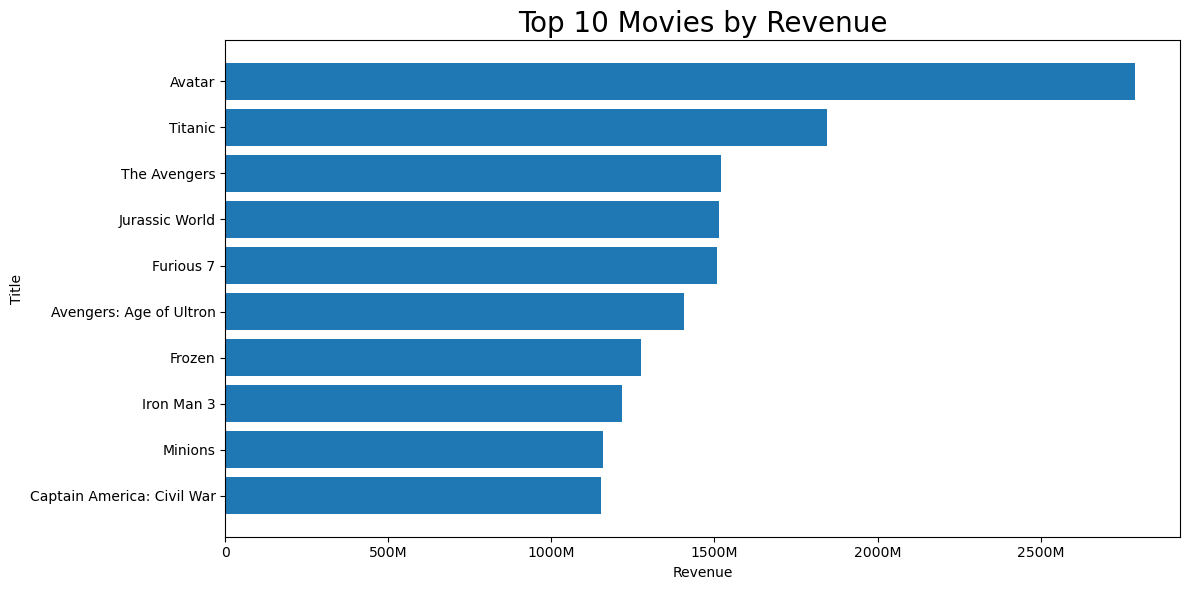

In [9]:
# Sort the DataFrame based on 'revenue' and select the top 10 movies
top_10_by_revenue = movie.nlargest(10, 'revenue')

# Plotting the graph for revenue vs title
plt.figure(figsize=(12, 6))
plt.barh(top_10_by_revenue['title'], top_10_by_revenue['revenue'])
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))
plt.xlabel('Revenue')
plt.ylabel('Title')
plt.title('Top 10 Movies by Revenue', size = 20)
plt.gca().invert_yaxis()  # Invert y-axis to display highest revenue on top
plt.tight_layout()
plt.show()

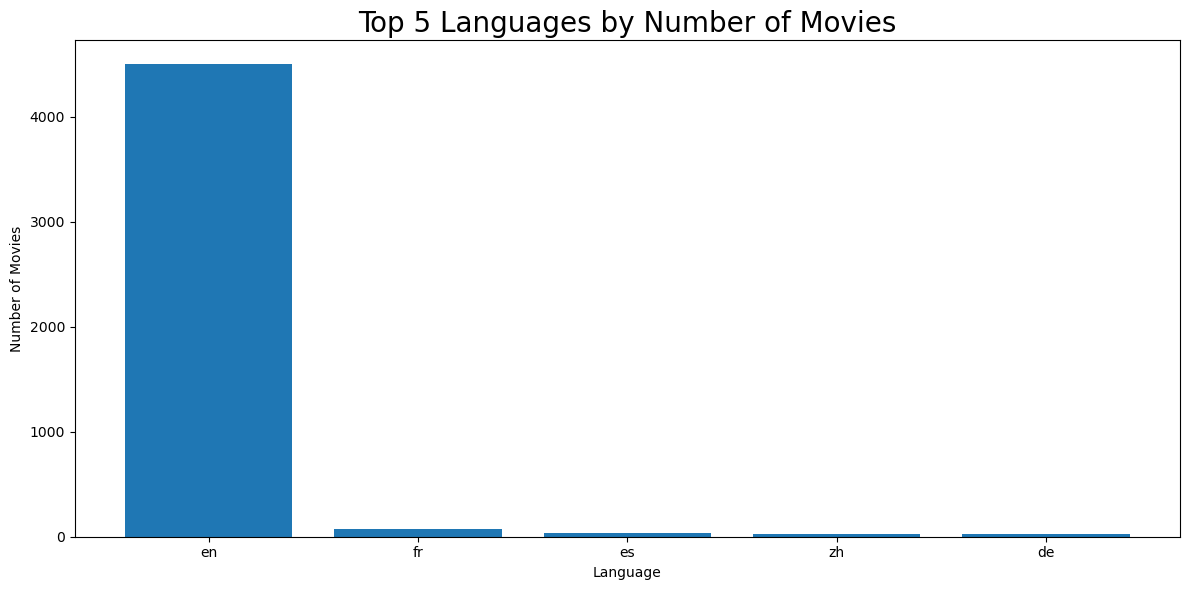

In [10]:
# Find the count of movies for each language
language_counts = movie['original_language'].value_counts()

# Select the top 5 languages
top_5_languages = language_counts.head(5)

# Plotting the graph for top 10 languages
plt.figure(figsize=(12, 6))
plt.bar(top_5_languages.index, top_5_languages.values)
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Top 5 Languages by Number of Movies', size = 20)
plt.tight_layout()
plt.show()

In [11]:
print("Credits Dataset:\n")
credit.head()

Credits Dataset:



,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Preprocessing the data

In [12]:
# Merging both dataframes on the bases of title

movie = movie.merge(credit, on = 'title')
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [13]:
# Extracting the important features and putting it into movies dataframe

movies = movie[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [15]:
# Dropping the movies which have blank cells (in this case is overview)

movies = movies.copy()

movies.dropna(inplace = True)

In [16]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
# Checking for duplicate rows

movies.duplicated().sum()

0

In [18]:
movies.shape

(4806, 7)

In [19]:
# A convert function for removing unnecessary stuffs from genre and keywords column, using `ast.literal_eval` because it converts string list to a normal list and genre and keywords are in the form of string lists

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [20]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
# convert_cast function is same as convert function the only change is that it will select only top 3 cast of the movie

def convert_cast(text):
    count = 0
    L = []
    for i in ast.literal_eval(text):
        if count < 3:
            L.append(i['name'])
            count +=1
        else:
            break

    return L 

In [23]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
# convert_crew function is same as convert function the only change is that it will select only director (job : director) of the movie

def convert_crew(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [25]:
movies['crew'] = movies['crew'].apply(convert_crew)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [26]:
# Converting overview into a list because it will help to concatenate with other features which are also lists

movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [27]:
# collapse function will remove the spaces for example Sam Mendes = SamMendes, it will help to create a single tag because spaces can lead to the formation of unecessary stuffs such as Sam tag and Mendes tag instead of SamMendes tag

def remove_spaces(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [28]:
movies['cast'] = movies['cast'].apply(remove_spaces)
movies['crew'] = movies['crew'].apply(remove_spaces)
movies['genres'] = movies['genres'].apply(remove_spaces)
movies['keywords'] = movies['keywords'].apply(remove_spaces)

In [29]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [30]:
# Concatenate all the features except id and title into tags column

movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [31]:
# Drop the remaining columns

df = movies.drop(columns=['overview','genres','keywords','cast','crew'])
df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [32]:
# Coverting tags into string because model will take it in the form of string

df['tags'] = df['tags'].apply(lambda x: " ".join(x))
df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [33]:
df.tags[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [34]:
# Converting the tags feature into lowercase

df['tags'] = df['tags'].apply(lambda x:x.lower())
df.tags[0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [35]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [36]:
# clean_tags is used to remove commas, special characters and more than one space

def clean_tags(input_string):
    # Define a string containing all punctuation characters and commas
    special_chars = string.punctuation + ','

    # Create a translation table to remove the specified characters
    translation_table = str.maketrans('', '', special_chars)

    # Use the translation table to remove the characters from the input string
    cleaned_string = input_string.translate(translation_table)

    # Remove spaces more than one
    cleaned_string =  " ".join(cleaned_string.split())

    return cleaned_string

In [37]:

df['tags'] = df['tags'].apply(clean_tags)

In [38]:
df['tags'].values[0]

'in the 22nd century a paraplegic marine is dispatched to the moon pandora on a unique mission but becomes torn between following orders and protecting an alien civilization action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [39]:
# from nltk.stem.porter import PorterStemmer

# ps = PorterStemmer()

In [40]:
# # Helper functionn to perform Stemming, Stemming is used instead of Lemmatizing becasue lematizing is slow as compared to stemming but it produces accurate result but the data is very large which can increase the overhead that's why stemming is suitable in this case

# def stem(text):
#     y = []

#     for i in text.split():
#         y.append(ps.stem(i))

#     return " ".join(y)

# stem('lovers loving loves loved caring cars')

In [41]:
# df['tags'] = df['tags'].apply(stem)
# df['tags'][0]

In [42]:
%pip install spacy && python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
                                              0.0/12.8 MB ? eta -:--:--
                                              0.1/12.8 MB 2.6 MB/s eta 0:00:05
                                              0.2/12.8 MB 2.7 MB/s eta 0:00:05
     -                                        0.4/12.8 MB 2.8 MB/s eta 0:00:05
     -                                        0.5/12.8 MB 2.7 MB/s eta 0:00:05
     -                                        0.6/12.8 MB 2.6 MB/s eta 0:00:05
     --                                       0.7/12.8 MB 2.7 MB/s eta 0:00:05
     --                                       0.8/12.8 MB 2.6 MB/s eta 0:00:05
     --                                       0.9/12.8 MB 2.6 MB/s eta 0:00:05
     ---                                      1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ---                                      1.2/12.8 MB 2.5 MB/s eta 0:00:05
     ---      

In [43]:
import spacy
from spacy.lang.en import English

In [44]:
# Load the spaCy language model (for English)
nlp = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = nlp(text)

    # Lemmatize each token and join them back into a string
    lemmatized_tokens = [token.lemma_ for token in doc]
    return " ".join(lemmatized_tokens)

In [45]:
# Divide the DataFrame into smaller batches to avoid memory issues
batch_size = 500
batches = [df[i:i + batch_size] for i in range(0, df.shape[0], batch_size)]

# Process each batch separately with three CPU cores for parallel processing
#nlp.pipe() only works on string not on tokens/list
for batch in batches:
    batch['tags'] = list(nlp.pipe(batch['tags'], n_process=3, batch_size=500))

# Concatenate the processed batches back into the original DataFrame
df = pd.concat(batches)

# Update the 'text' column to convert the spaCy Doc objects to lemmatized strings
df['tags'] = df['tags'].apply(lambda doc: " ".join([token.lemma_ for token in doc]))

C:\Users\umerr\AppData\Local\Temp\ipykernel_18076\2646657392.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['tags'] = list(nlp.pipe(batch['tags'], n_process=3, batch_size=500))


In [46]:
df['tags'].values[0]

'in the 22nd century a paraplegic marine be dispatch to the moon pandora on a unique mission but become tear between follow order and protect an alien civilization action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelation mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [47]:
df['tags'].values[4805]

'ever since the second grade when he first see she in et the extraterrestrial brian herzlinger have have a crush on draw barrymore now 20 year later he s decide to try to fulfill his lifelong dream by ask she for a date there s one small problem she s draw barrymore and he s well brian herzlinger a broke 27yearold aspire filmmaker from new jersey documentary obsession camcorder crush dreamgirl drewbarrymore brianherzlinger coreyfeldman brianherzlinger jongunn brettwinn'

In [48]:
df.head()

,movie_id,title,tags
0,19995,Avatar,in the 22nd century a paraplegic marine be dis...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believe to be dead have ...
2,206647,Spectre,a cryptic message from bond ’s past send he on...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,john carter be a warweary former military capt...


## Vectorizing the Dataset

In [49]:
# It will count the frequency of top 5000 words, It is basically converting string text to vector text

# cv = CountVectorizer(max_features=5000,stop_words='english')
# vector = cv.fit_transform(df['tags']).toarray()

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vector = tfidf_vectorizer.fit_transform(df['tags']).toarray()

vector.shape

(4806, 5000)

In [50]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
tfidf_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

## Calculating Similarity

- If your data is text-based or consists of high-dimensional feature vectors where the magnitude doesn't matter as much, `cosine` similarity can be a good choice.

- If you are dealing with user-item rating data (e.g., movie ratings), `adjusted cosine` similarity might be more appropriate to handle user/item biases.

- If your data is numerical and you want to capture linear relationships and are not concerned about outliers, `Pearson correlation` coefficient can be useful.

In [52]:
# Using similarity cosine because it will give the similarities between the movies by assigning angles(θ) between them because there are so many dimensions and euclidean distance will not work so assigning angle is much more suitable

similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.022938  , 0.03074466, ..., 0.021659  , 0.00578959,
        0.        ],
       [0.022938  , 1.        , 0.01348488, ..., 0.02395575, 0.        ,
        0.        ],
       [0.03074466, 0.01348488, 1.        , ..., 0.02337344, 0.01819085,
        0.        ],
       ...,
       [0.021659  , 0.02395575, 0.02337344, ..., 1.        , 0.01620715,
        0.02050257],
       [0.00578959, 0.        , 0.01819085, ..., 0.01620715, 1.        ,
        0.00723836],
       [0.        , 0.        , 0.        , ..., 0.02050257, 0.00723836,
        1.        ]])

In [53]:
similarity.shape

(4806, 4806)

In [54]:
# This function will fetch five closest movies on the bases of angles

def recommend(movie):
    index = df[df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1]) # enumerate will assign the index number to shortest angle/distance, reverse is used for descending order
    
    for i in distances[1:6]:
        print(df.iloc[i[0]].title)

In [55]:
recommend("Batman")

Batman
Batman & Robin
The Dark Knight Rises
Batman Returns
Batman


In [59]:
pickle.dump(df.to_dict(), open('movie_dict.pkl', 'wb'))

In [60]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [61]:
import shutil

shutil.move("movie_dict.pkl", "movie recommender webapp")
shutil.move("similarity.pkl", "movie recommender webapp")

'movie recommender webapp\\similarity.pkl'

## User Based Collaborative Filtering

In [62]:
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [63]:
# Sort the DataFrame by the "popularity" column in descending order
sorted_movies = movie.sort_values(by='popularity', ascending=False)

In [64]:
# Select the top 100 movies
top_100_movies = sorted_movies.head(100)

In [65]:
top_100_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,211672,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de..."
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,157336,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de..."
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,293660,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de..."
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,118340,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de..."
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,76341,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de..."


In [66]:
# Keep only the "id" and "original_title" columns
selected_columns = ['id', 'original_title']
top_100_movies = top_100_movies[selected_columns]

In [67]:
top_100_movies.head()

,id,original_title
546,211672,Minions
95,157336,Interstellar
788,293660,Deadpool
94,118340,Guardians of the Galaxy
127,76341,Mad Max: Fury Road


In [68]:
# Save the result to a new CSV file
top_100_movies.to_csv('datasets/top_100_movies.csv', index=False)

In [69]:
new_movies = pd.read_csv('datasets/top_100_movies.csv')
new_movies.head()

,id,original_title
0,211672,Minions
1,157336,Interstellar
2,293660,Deadpool
3,118340,Guardians of the Galaxy
4,76341,Mad Max: Fury Road


In [70]:
import random

random.seed(42)
# Load the original dataset
original_dataset = pd.read_csv('datasets/top_100_movies.csv')

# Generate a new dataset with user_id, id, and original_title
users = list(range(100, 111))
user_ids = random.choices(users, k=len(original_dataset) * 2)  # Double the length to allow repetition
movie_ids = original_dataset['id'].tolist() * 2  # Repeat movie IDs for each user
original_titles = original_dataset['original_title'].tolist() * 2  # Repeat movie titles for each user

new_dataset = pd.DataFrame({
    'user_id': user_ids,
    'id': movie_ids,
    'original_title': original_titles
})

# Save the new dataset to a new CSV file
new_dataset.to_csv('datasets/new_movie_dataset.csv', index=False)


In [71]:
user_movie_data = pd.read_csv("datasets/new_movie_dataset.csv")

In [72]:
user_movie_data.head()

,user_id,id,original_title
0,107,211672,Minions
1,100,157336,Interstellar
2,103,293660,Deadpool
3,102,118340,Guardians of the Galaxy
4,108,76341,Mad Max: Fury Road


In [73]:
df = pd.DataFrame(user_movie_data)
df.head()

,user_id,id,original_title
0,107,211672,Minions
1,100,157336,Interstellar
2,103,293660,Deadpool
3,102,118340,Guardians of the Galaxy
4,108,76341,Mad Max: Fury Road


In [74]:
def recommend_movies(user_id, num_recommendations=3):

    # Filter data for the given user_id
    user_data = df[df['user_id'] == user_id]
    
    # Get the movie id that the user has watched
    watched_movies = user_data['id'].tolist()

    # Pivot table for user-item matrix
    user_item_matrix = df.pivot_table(index='user_id', columns='original_title', values='id', fill_value=0) # If a user hasn't watched a particular movie, the matrix is filled with 0.

    # user_item_index will look like:

    # original_title  Movie A  Movie B  Movie C  Movie D
    # user_id                                            
    # 100                   1        1        0        0
    # 101                   0        1        0        1
    # 102                   0        0        1        0
    # 103                   1        0        0        1

    print(user_item_matrix.shape)
    
    # Calculate cosine similarity between users
    similarity_matrix = cosine_similarity(user_item_matrix)

    # Print the size of the similarity matrix
    print("Size of the similarity matrix:", similarity_matrix.shape)

    # Get the most similar user
    similar_user_idx = similarity_matrix[user_id - 100].argsort()[-2] # [-2] selects the second-to-last index, which corresponds to the most similar user.

    # Get movies watched by the similar user
    similar_user_movies = df[df['user_id'] == similar_user_idx + 100]['original_title'].tolist()

    # Recommend movies that the target user hasn't watched
    recommendations = [movie for movie in similar_user_movies if movie not in watched_movies][:num_recommendations]

    return recommendations

In [75]:
user_id_input = int(input("Write user id (100 to 110)"))
recommendations = recommend_movies(user_id_input)
print(f"Recommended movies for user {user_id_input}: {recommendations}")

(11, 100)
Size of the similarity matrix: (11, 11)
Recommended movies for user 100: ['The Godfather', 'Pixels', 'Fury']
